## Assignment 2
Canal boats in Amsterdam

In [1]:
#Scrape data from the online register passagiersvaart

import requests
from bs4 import BeautifulSoup

#Access the website containing the municipal passenger shipping register
URL = "https://www.amsterdam.nl/verkeer-vervoer/varen-amsterdam/varen-beroepsvaart/register-passagiersvaart-amsterdam/"
page = requests.get(URL)

#Retreive HTML data
soup = BeautifulSoup(page.content, "html.parser")

#References: Stackoverflow, Medium

In [2]:
#transform data into lists for every column

l1 = []
l2 = []
for td_tag in soup.find_all('td'):
    l1.append(td_tag.text) 
x = 0
count = 1
operators = []
name = []
amount = []
numberinuse = []
segment = []
enddate = []
area = []

for i in l1:
    if x%7 == 0:
        operators.append(i)
        l2.append(count)
        count = count + 1
    if x%7 == 1:
        name.append(i)
    if x%7 == 2:
        amount.append(i)
    if x%7 == 3:
        numberinuse.append(i)
    if x%7 == 4:
        segment.append(i)
    if x%7 == 5:
        enddate.append(i)
    if x%7 == 6:
        area.append(i)
    x = x + 1 

In [3]:
#combine lists into dictionary

from itertools import zip_longest

canalboatsdic = {
    row[0]: row[1:]
    for row in zip_longest(l2,
                            operators,
                            name,
                            amount,
                            numberinuse,
                            segment,
                            enddate,
                            area)
}

print(canalboatsdic)

#References: Stackoverflow

{1: ("Adam's Boats B.V.", 'Adam 01 t/m Adam 10', '10', '10', 'onbemand', '1 maart 2026', '1'), 2: ('Ambolux Classic Ecoboats', 'Ambolux 3', '1', '1', 'bemand open', '1 maart 2030', '1'), 3: ('Amsterdam Boat Adventures vof', 'Amsterdam Boat Adventures', '1', '1', 'bemand open', '1 maart 2028', '1'), 4: ('Amsterdam Boat Center', 'Amigo', '1', '1', 'bemand open', '1 maart 2024', '1'), 5: ('Amsterdam Boat Center', 'Salonboot Tzar', '1', '1', 'bemand open', '1 maart 2028', '1'), 6: ('Amsterdam Boat Center', 'Wan-Hoop', '1', '1', 'klein & middelgroot', '1 maart 2028', '1'), 7: ('Amsterdam Boat Company B.V.', 'Mosi Jo', '1', '1', 'klein & middelgroot', '1 maart 2030', '1'), 8: ('Amsterdam Boat Company B.V.', 'Zaza', '1', '0', 'klein & middelgroot', '1 maart 2028', '1'), 9: ('Amsterdam Boat Events', "De Tijd zal 't Leeren", '1', '1', 'bemand groot', '1 maart 2028', '1'), 10: ('Amsterdam Boattrips', 'Britannia 2', '1', '1', 'bemand open', '1 maart 2026', '1'), 11: ('Amsterdam Boothuur B.V.', 'B

In [38]:
#Transform the dictionary into a dataframe

import pandas as pd

df = pd.DataFrame(data=canalboatsdic)

df = (df.T)
df.rename(columns={0: "Operator", 1: "Name of boat(s)", 2: "Amount of boats", 3: "Number of boats in use", 4: "Segment", 5: "End date", 6: "Area"  }, inplace=True)

df.head()

,Operator,Name of boat(s),Amount of boats,Number of boats in use,Segment,End date,Area
1,Adam's Boats B.V.,Adam 01 t/m Adam 10,10,10,onbemand,1 maart 2026,1
2,Ambolux Classic Ecoboats,Ambolux 3,1,1,bemand open,1 maart 2030,1
3,Amsterdam Boat Adventures vof,Amsterdam Boat Adventures,1,1,bemand open,1 maart 2028,1
4,Amsterdam Boat Center,Amigo,1,1,bemand open,1 maart 2024,1
5,Amsterdam Boat Center,Salonboot Tzar,1,1,bemand open,1 maart 2028,1


In [9]:
#Select all the canal boats

df2 = df[df["Segment"]=="bemand groot"]
df2["numberinuse_int"] = pd.to_numeric(df2["Number of boats in use"])
numberofboats = sum(df2["numberinuse_int"])
print("The total of canal boats in Amsterdam is", numberofboats)


The total of canal boats in Amsterdam is 145


C:\Users\Eigenaar\AppData\Local\Temp\ipykernel_10916\3925466317.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["numberinuse_int"] = pd.to_numeric(df2["Number of boats in use"])


Calculate the energy use of canal boats in the city

In [35]:
#import table information from report in pdf
import tabula 
dfpdf = tabula.read_pdf("TNO_rapport.pdf", pages='19')

#extract information on energy use
energy_usehour = dfpdf[0]['Gemiddeld\renergiegebruik\rper uur [kWh]'][0]
energy_usehour = energy_usehour.replace(',', '.')

#adjust type
numberofboats = float(numberofboats)
energy_usehour = float(energy_usehour)

#calculate total energy demand
energy_demand_hour = numberofboats*energy_usehour
total_energy_demand = energy_demand_hour*2500

#compare to other activities
energy_use_tram = 44124174 #data from jaarrapport GVB
energy_use_bus = 1900731 #data from jaarrapport GVB, concers 31 electric busses

print("The energy demand for all canal boat per hour is", energy_demand_hour, "KWh")
print("The average canal boat operates 2500 hours a year. This results in a total energy demand of", int(total_energy_demand), "KWh per year")
print("This is", round(energy_use_tram/total_energy_demand,1), "less than yearly energy use of trams in Amsterdam")
print("Compared to an electric bus, an electric canal boat uses", round((energy_use_bus/31)/(energy_usehour*2500), 2), "times more energy per year.")



The energy demand for all canal boat per hour is 3059.5 KWh
The average canal boat operates 2500 hours a year. This results in a total energy demand of 7648750 KWh per year
This is 5.8 less than yearly energy use of trams in Amsterdam
Compared to an electric bus, an electric canal boat uses 1.16 times more energy per year.


Determine the peak times for canal boats

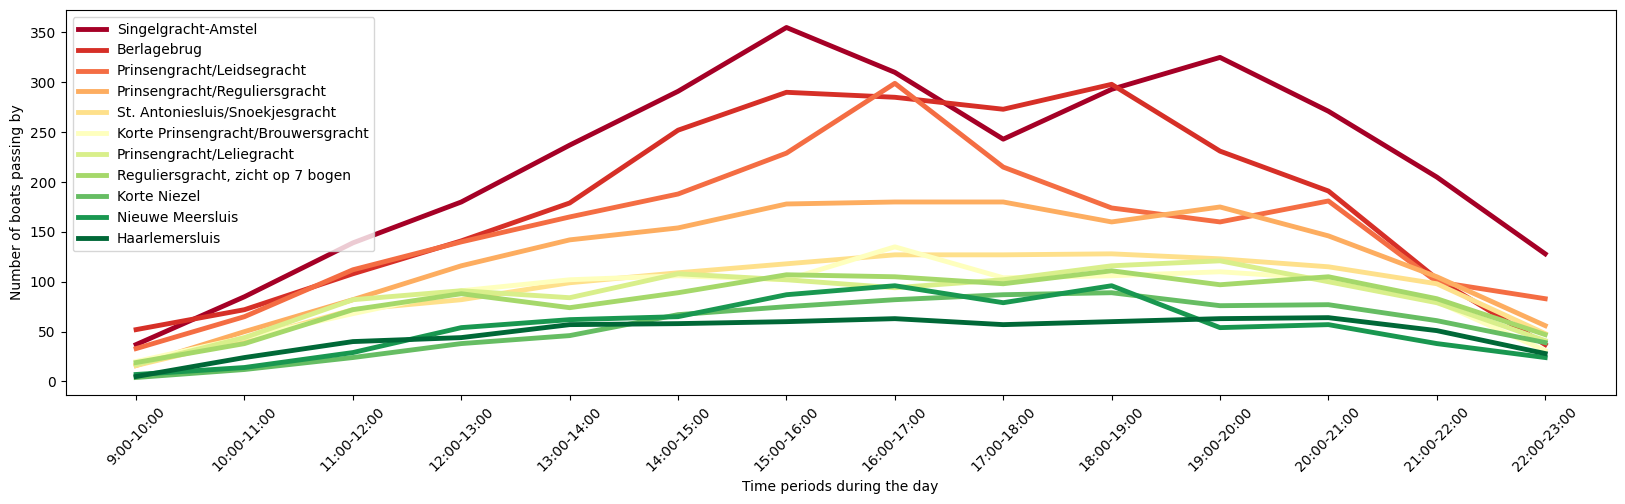

"#Export to csv\ndf_gracht2 = df_gracht.T\ndf_gracht2.to_csv('gracht2.csv', sep=',', encoding='utf-8')"

In [11]:
import matplotlib.pyplot as plt
import numpy as np

#import the data from grachtmonitor
df_canalboats = pd.read_excel("gracht.xlsx")
df_canalboats = df_canalboats.iloc[0:14, 0:12]
df_canalboats = df_canalboats.set_index(df_canalboats.columns[0])

#sort the different measuring points by highest average value
average_values = df_canalboats.mean()
sorted_columns = average_values.sort_values(ascending=False).index

#Make a graph in which the busiest points are represented by red and opposite by green
colormap = plt.get_cmap('RdYlGn')
line_colors = [colormap(i) for i in np.linspace(0, 1, len(sorted_columns))]

x_values = np.arange(len(df_canalboats.index)) 
x_labels = df_canalboats.index

ax = df_canalboats[sorted_columns].plot(figsize=(20, 5), color=line_colors, linewidth='3.5')

ax.set_xticks(x_values)
ax.set_xlabel("Time periods during the day")
ax.set_ylabel("Number of boats passing by")
ax.set_xticklabels(x_labels, rotation=45) 
plt.show()

df_canalboats.head()

#References: Stackoverflow



In [12]:
#Match the measuring points with geometry data and transform it into a dataframe

listnames = []
listgeo = []
df_measuringpoints = pd.read_excel("meetpunten.xlsx") #coordinates of measuring points, data retreived from google maps

for i in df_measuringpoints['Geometry']:
    listgeo.append(i)

for i in df_canalboats.columns:
    listnames.append(i)

dict_geo = {key: value for key, value in zip(listnames, listgeo)}
df_geo = pd.DataFrame(list(dict_geo.items()), columns=['Name', 'Geometry'])
df_geo[['Latitude', 'Longitude']] = df_geo['Geometry'].str.split(', ', expand=True)

df_geo




,Name,Geometry,Latitude,Longitude
0,Berlagebrug,"52.34731041620543, 4.912464234049668",52.34731041620543,4.912464234049668
1,Haarlemersluis,"52.378855408032734, 4.894052455733411",52.378855408032734,4.894052455733411
2,Korte Niezel,"52.3747813856251, 4.899337459619198",52.3747813856251,4.899337459619198
3,Korte Prinsengracht/Brouwersgracht,"52.381504406085575, 4.889320914469436",52.381504406085575,4.889320914469436
4,Nieuwe Meersluis,"52.3390697100906, 4.84682573678532",52.3390697100906,4.84682573678532
5,Prinsengracht/Leidsegracht,"52.36619139823907, 4.882766486124969",52.36619139823907,4.882766486124969
6,Prinsengracht/Reguliersgracht,"52.361609137238545, 4.896049060525268",52.361609137238545,4.896049060525268
7,Prinsengracht/Leliegracht,"52.37593571879353, 4.884250522824771",52.37593571879353,4.884250522824771
8,"Reguliersgracht, zicht op 7 bogen","52.36481430860875, 4.895862174664486",52.36481430860875,4.895862174664486
9,Singelgracht-Amstel,"52.3592314826586, 4.904608930896866",52.3592314826586,4.904608930896866


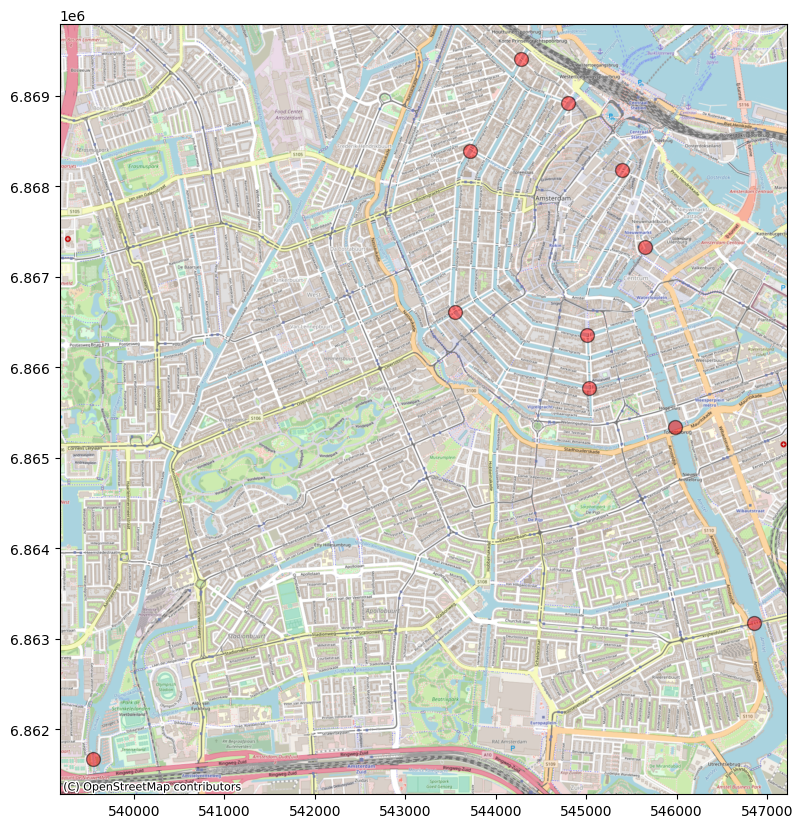

,Name,Geometry,Latitude,Longitude,geometry
0,Berlagebrug,"52.34731041620543, 4.912464234049668",52.34731041620543,4.912464234049668,POINT (4.91246 52.34731)
1,Haarlemersluis,"52.378855408032734, 4.894052455733411",52.378855408032734,4.894052455733411,POINT (4.89405 52.37886)
2,Korte Niezel,"52.3747813856251, 4.899337459619198",52.3747813856251,4.899337459619198,POINT (4.89934 52.37478)
3,Korte Prinsengracht/Brouwersgracht,"52.381504406085575, 4.889320914469436",52.381504406085575,4.889320914469436,POINT (4.88932 52.38150)
4,Nieuwe Meersluis,"52.3390697100906, 4.84682573678532",52.3390697100906,4.84682573678532,POINT (4.84683 52.33907)
5,Prinsengracht/Leidsegracht,"52.36619139823907, 4.882766486124969",52.36619139823907,4.882766486124969,POINT (4.88277 52.36619)
6,Prinsengracht/Reguliersgracht,"52.361609137238545, 4.896049060525268",52.361609137238545,4.896049060525268,POINT (4.89605 52.36161)
7,Prinsengracht/Leliegracht,"52.37593571879353, 4.884250522824771",52.37593571879353,4.884250522824771,POINT (4.88425 52.37594)
8,"Reguliersgracht, zicht op 7 bogen","52.36481430860875, 4.895862174664486",52.36481430860875,4.895862174664486,POINT (4.89586 52.36481)
9,Singelgracht-Amstel,"52.3592314826586, 4.904608930896866",52.3592314826586,4.904608930896866,POINT (4.90461 52.35923)


In [13]:
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx
import matplotlib.pyplot as plt


#transform dataframe into a GeoDataFrame
df_geo = gpd.GeoDataFrame(df_geo, geometry=gpd.points_from_xy(df_geo['Longitude'], df_geo['Latitude']), crs="EPSG:4326")
ax = df_geo.to_crs(epsg=3857).plot(figsize=(10, 10), alpha=0.5, edgecolor="k", color="red", markersize=100)
ctx.add_basemap(ax, zoom=15, source=ctx.providers.OpenStreetMap.Mapnik) 
plt.show()

df_geo


PermissionError: [Errno 13] Permission denied: '/1boats_at_time.png'

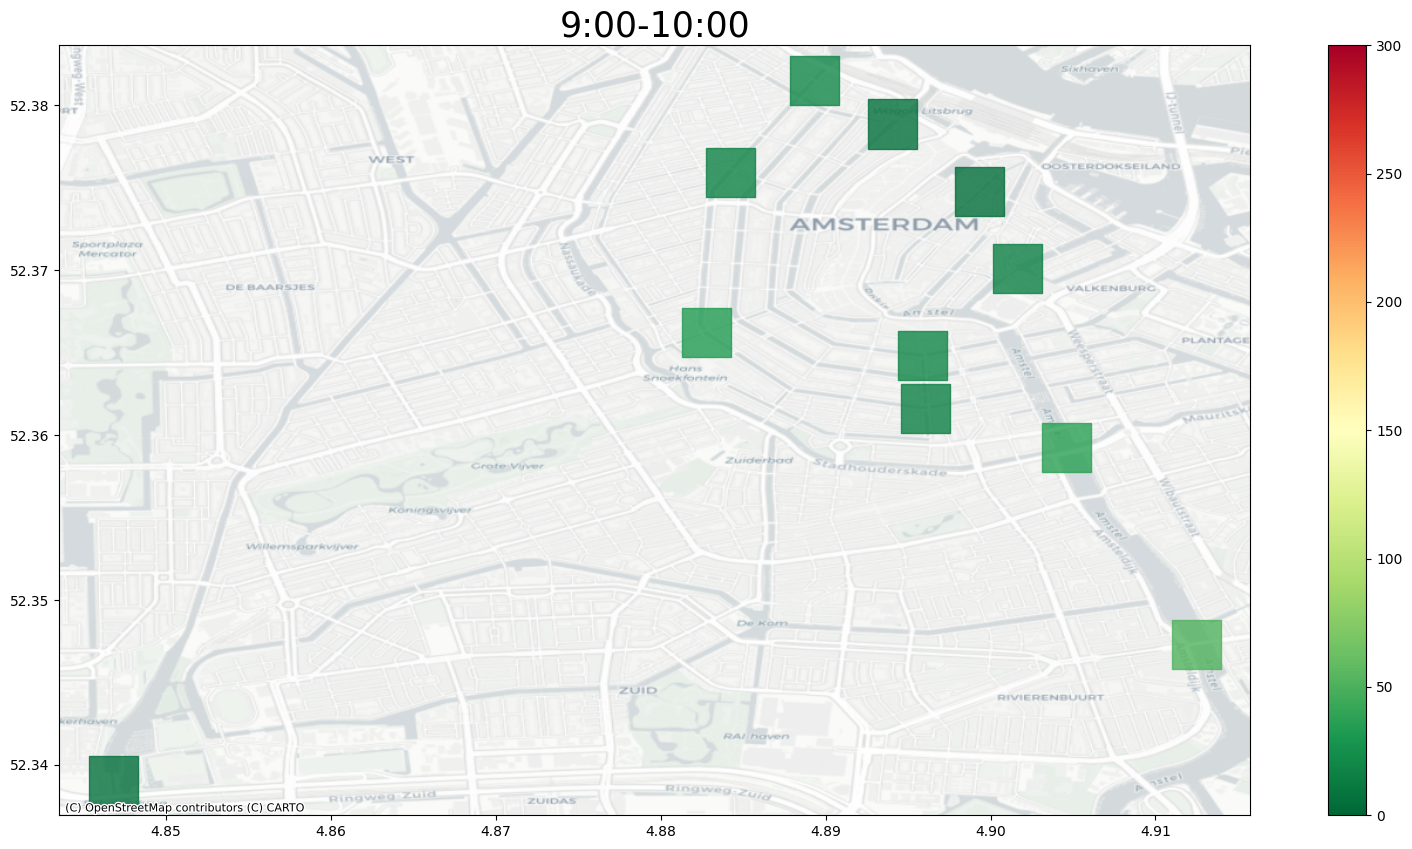

In [39]:
import os
import gc

#format data to be suitable to join together
df_canalboats_pivot = df_canalboats.T
measurepoints = df_geo
df_canalboats_pivot['name_measurepoint'] = df_canalboats_pivot.index
df_canalboats_pivot = df_canalboats_pivot.reset_index(drop=True)

#join data 
joinData = measurepoints.set_index('Name').join(df_canalboats_pivot.set_index('name_measurepoint'))
outputpath = "Assignment 2"

hours = []
for x in range (4, 18):
    hours.append(joinData.columns[x])

#determine details for the legend
vmin, vmax = 0, 300
x = 1

#create image for all the time periods
for hour in hours:
    fig, ax = plt.subplots(1,1,figsize=(20,10))
    map = joinData.plot(ax = ax, column = hour, cmap = 'RdYlGn_r', vmin = vmin, vmax = vmax, markersize=1250, alpha = 0.8, marker='s', legend=True)
    map.set_title(hour, fontsize = 25)
    ctx.add_basemap(ax, crs=joinData.crs, source=ctx.providers.CartoDB.Positron)
    
    filepath = os.path.join(outputpath, str(x) + 'boats_at_time.png')
    mapfig = map.get_figure()
    mapfig.savefig(filepath)
    plt.close('all')
    mapfig.clf()
    gc.collect()
    x = x+1

#References: Stackoverflow, Youtube


In [12]:
#combine all the images into one GIF
from PIL import Image
import glob

frames = []
images = glob.glob(outputpath + '/*.png')

for i in images:
    image_frame = Image.open(i)
    frames.append(image_frame)

frames[0].save(outputpath + '/boatsattime.gif', format = 'GIF', append_images = frames[1:], save_all = True, duration = 1000, loop = 0)     

Calculate the economic feasibility

8.53080568720379 7.582938388625592


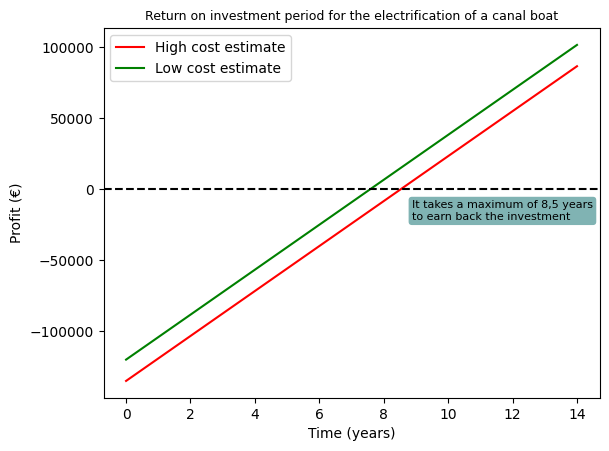

15825.000000000002


In [73]:
from matplotlib.patches import Ellipse
from matplotlib.text import OffsetFrom

#state variables
costs_to_electric_low = 70000
costs_to_electric_high = 85000
costs_operational_loss = 50000

operational_hours_year = 3000
price_electricity_kwh = 0.39
price_fuel_liter = 1.6
price_fuel_kwh = price_fuel_liter/2.5

#calculate business case
profit_from_elec = (price_fuel_kwh-price_electricity_kwh)*energy_usehour*operational_hours_year

business_case = -(costs_to_electric_high+costs_operational_loss)+profit_from_elec

profit_low = []
for year in range(0, 15):
    business_case = -(costs_to_electric_high+costs_operational_loss)+profit_from_elec*year
    profit_low.append(business_case)

profit_high = []
for year in range(0, 15):
    business_case = -(costs_to_electric_low+costs_operational_loss)+profit_from_elec*year
    profit_high.append(business_case)

#calculate payback-time
total_cost_high = costs_to_electric_high + costs_operational_loss
total_cost_low = costs_to_electric_low + costs_operational_loss

year_high = total_cost_high/profit_from_elec
year_low = total_cost_low/profit_from_elec
print(year_high, year_low)

#plot the return on investment
fig, ax = plt.subplots()
plt.plot(profit_low, label='High cost estimate', color = 'red' )
plt.plot(profit_high, label='Low cost estimate', color = 'green')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Time (years)')
plt.ylabel('Profit (€)')
plt.title('Return on investment period for the electrification of a canal boat', fontsize = 9)

#annotate return on investment
ax.annotate('It takes a maximum of 8,5 years\nto earn back the investment',
            xy=(year_high, 0), xycoords='data',
            xytext=(8, -22), textcoords='offset points',
            bbox=dict(boxstyle="round",
                      fc=(0.5, 0.7, 0.7), ec="none"),
            fontsize = 8
)




plt.legend()
plt.show()
print(profit_from_elec)




Calculate the possibility of supplying the needed energy with renewables

In [37]:
energy_production_pv = 340 #https://www.vattenfall.nl/zonnepanelen/opbrengst/
energy_production_wind = 6500000 #https://www.gaslicht.com/energie-informatie/windmolen#:~:text=Vermogen%20van%20een%20windmolen,-Hoe%20zit%20dat&text=Een%20windmolen%20met%20een%20vermogen,huishouden%20van%20stroom%20kan%20voorzien.

solarpanels = int(total_energy_demand/energy_production_pv)
windturbines = round((total_energy_demand/energy_production_wind),1)
print(windturbines)

df_platdak = pd.read_excel("Plat_dak_gemeente_20210823.xlsx")
amsterdam_data = df_platdak[df_platdak['Gemeentenaam 2021'] == "Amsterdam"]
last_index = amsterdam_data.index[-1]

get_next_rows = df_platdak.iloc[last_index + 1:last_index + 13]
df_platdak_total = pd.concat([amsterdam_data, get_next_rows])
area = 0 
for row in df_platdak_total["Wel plat dak (m2)"]:
    #print(row)
    area = area + row

print(area/1.94) #possible solar panels
print("There is", area, "m2 of flat roof space in Amsterdam. This is enough space for", int(area/1.94), "solar panels. More then sufficient then the", solarpanels, "solar panels that are required. To produce the energy with windturbines,", windturbines, "windturbines are needed. This also fits in the cuurent plans of the municipality to build wind turbines within the municipal boundaries")



1.2
9753130.927835051
There is 18921074 m2 of flat roof space in Amsterdam. This is enough space for 9753130 solar panels. More then sufficient then the 22496 solar panels that are required. To produce the energy with windturbines, 1.2 windturbines are needed. This also fits in the cuurent plans of the municipality to build wind turbines within the municipal boundaries
